<a href="https://colab.research.google.com/github/elizamelo/FisicaGeral/blob/main/100Resistores180k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
from scipy import stats


In [55]:
#Valor nominal ou do fabricante
R_ref= 180.0 #(kΩ)

In [56]:
##Exemplo: Medidas dos 100 resistores de 890 ± 5% (kΩ)

array_100 = [179,178.7,180.2,177.7,176.7,178.8,177.5,177.1,179.4,176.9,177.4,180.6,178,181.8,178.4,178.1,178.3,177.1,178,178.6,177,180.9,178.6,176.9,178.5,178.2,180.3,177.7,178.4,178.5,176.8,179,176.4,180,177,176.8,174.8,177.8,180,178.8,176.5,181.2,179,178.6,179.9,177.1,176.7,178.3,176.2,178.5,176.5,176.2,179,177.2,178.7,180.1,178.6,178.3,183,178.8,179.1,175.4,177.5,177.3,178.9,178.7,177.2,188.4,177.9,179.3,181.2,175.8,179.3,178.7,178.1,178.9,179.5,175.3,177.3,178.6,178.2,176.8,177.8,180.1,177.6,177.7,180.4,176.9,180.2,178,177.1,176.2,180,178.7,178.2,181.8,177.8,179.6,177.9,178.7]
array_GR01 = [179,178.7,180.2,177.7,176.7,178.8,177.5,177.1,179.4,176.9,177.4,180.6,178,181.8,178.4,178.1,178.3,177.1,178,178.6] #(k ohms)
array_GR02 = [177,180.9,178.6,176.9,178.5,178.2,180.3,177.7,178.4,178.5,176.8,179,176.4,180,177,176.8,174.8,177.8,180,178.8] #(k ohms)
array_GR03 = [176.5,181.2,179,178.6,179.9,177.1,176.7,178.3,176.2,178.5,176.5,176.2,179,177.2,178.7,180.1,178.6,178.3,183,178.8] #(k ohms)
array_GR04 = [179.1,175.4,177.5,177.3,178.9,178.7,177.2,188.4,177.9,179.3,181.2,175.8,179.3,178.7,178.1,178.9,179.5,175.3,177.3,178.6] #(k ohms)
array_GR05 = [178.2,176.8,177.8,180.1,177.6,177.7,180.4,176.9,180.2,178,177.1,176.2,180,178.7,178.2,181.8,177.8,179.6,177.9,178.7] #(k ohms)


In [57]:
def compatibilidade(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-np.mean(array_100))/ec
  if d<=2.0:
    print("Compatível", d, ec, abs(np.mean(grupo)-np.mean(array_100)))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,ec, abs(np.mean(grupo)-np.mean(array_100)))
  else:
    print("Incompatível", d,ec,abs(np.mean(grupo)-np.mean(array_100)))
  return(d)

In [58]:
def compatibilidadeRef(grupo):
  e100 = (np.std(array_100, ddof=0 ))/np.sqrt(len(array_100))
  #egrupo = (np.std(grupo, ddof=1 ))/np.sqrt(len(grupo))
  #ec = np.sqrt((e100*e100)+(egrupo*egrupo))
  d = abs(np.mean(grupo)-R_ref)/e100
  if d<=2.0:
    print("Compatível", d, e100, abs(np.mean(grupo)-R_ref))
  elif d > 2.0 and d < 3.0:
    print("Inconclusivo", d,e100, abs(np.mean(grupo)-R_ref))
  else:
    print("Incompatível", d,e100,abs(np.mean(grupo)-R_ref))
  return(d)

Conjunto completo de valores de resistências (100):

In [59]:

amplitude_100=(np.max(array_100)-np.min(array_100))
print ( "Valor mínimo: {}".format( np.min(array_100) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_100) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_100 ) ,"(kΩ)")

Valor mínimo: 174.8 (kΩ)
Valor máximo: 188.4 (kΩ)
Amplitude: 13.599999999999994 (kΩ)


In [60]:
#Calculo da média
N100=len(array_100)
media_100=(np.sum(array_100)/N100)
vmin = np.min(array_100)
vmax = np.max(array_100)
print("média do conjunto de 100 resistores: {}".format( (media_100)),"(kΩ)")

média do conjunto de 100 resistores: 178.41199999999998 (kΩ)


In [61]:
#Usando o NumPy
np.mean( array_100 )

178.41199999999998

In [62]:
print("média do conjunto de 100 resistores: {}".format(np.mean( array_100 )),"(kΩ)")



média do conjunto de 100 resistores: 178.41199999999998 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Conjunto Completo de 100 Resistores')

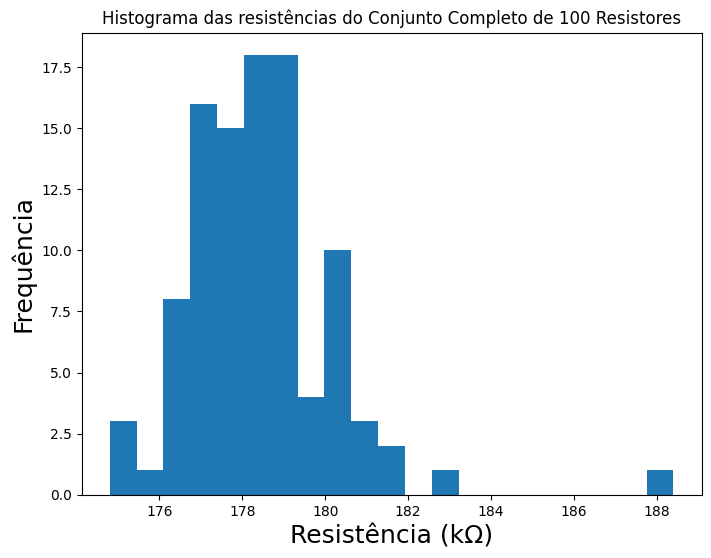

In [63]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_100, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Conjunto Completo de 100 Resistores', fontsize=12 )




Variância e desvio Padrão usando o NumPY:

In [64]:
var_100 = np.var( array_100, ddof=0 )
print ( "Variância do conj. de 100 resistores: {}".format(var_100),"(k^2Ω)" )
print ( "Desvio Padrao do conj. de 100 resistores: {}".format(np.sqrt(var_100)),"(kΩ)" )
sigma_m100 = np.std( array_100, ddof=0 )/np.sqrt(N100)
print ( "Erro da média do conj. de 100: {}".format(np.std( array_100, ddof=1 )/np.sqrt(N100)),"(kΩ)" )

Variância do conj. de 100 resistores: 3.171656 (k^2Ω)
Desvio Padrao do conj. de 100 resistores: 1.7809143718887779 (kΩ)
Erro da média do conj. de 100: 0.1789886289486829 (kΩ)


Estimativa Padrão dos 100 resistores:

In [87]:
print ( "R100 = {:.3f} ± {:.3f} (kΩ)".format( np.round( np.mean( array_100 ), 3 ), np.round( sigma_m100, 3 ) ) )


R100 = 178.412 ± 0.178 (kΩ)


Grupo 01 de valores de resistências:

In [66]:
amplitude_GR01=(np.max(array_GR01)-np.min(array_GR01))
print ( "Valor mínimo: {}".format( np.min(array_GR01) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR01) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR01 ) ,"(kΩ)")

Valor mínimo: 176.7 (kΩ)
Valor máximo: 181.8 (kΩ)
Amplitude: 5.100000000000023 (kΩ)


In [67]:
#Usando o NumPy
np.mean( array_GR01 )

178.41500000000002

In [68]:
#Calculo da média
N1_20=len(array_GR01)
media_GR01=(np.sum(array_GR01)/N1_20)
vmin = np.min(array_GR01)
vmax = np.max(array_GR01)

print("média do conjunto de 20 resistores do Grupo 01: {}".format( (media_GR01)),"(kΩ)")

média do conjunto de 20 resistores do Grupo 01: 178.41500000000002 (kΩ)


Text(0.5, 1.0, 'Histograma das resistências do Grupo 01 de 20 Resistores')

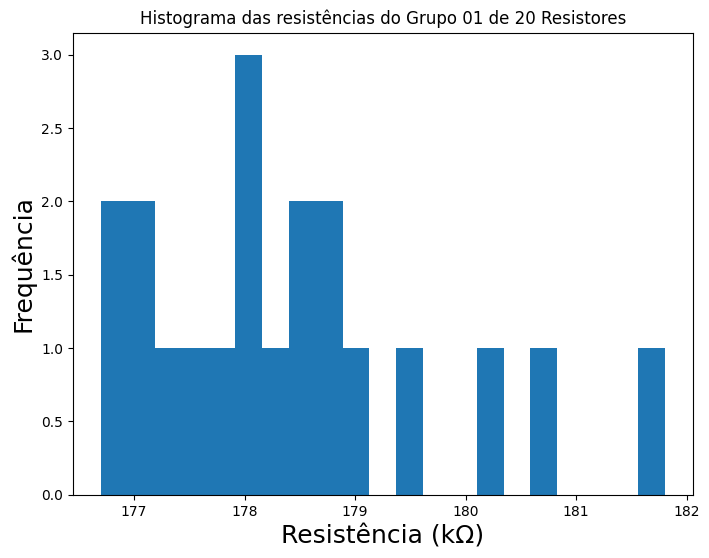

In [69]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR01, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 01 de 20 Resistores', fontsize=12 )


In [70]:
var_gr1 = np.var( array_GR01, ddof=1 )
print ( "Variância do Grupo 01: {}".format(var_gr1), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 01: {}".format(np.sqrt(var_gr1)),"(kΩ)" )
sigma_m1 = np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)
print ( "Erro da média do Grupo 01: {}".format(np.std( array_GR01, ddof=1 )/np.sqrt(N1_20)),"(kΩ)" )

Variância do Grupo 01: 1.711868421052636 (k^2Ω)
Desvio Padrao do do Grupo 01: 1.3083838966651324 (kΩ)
Erro da média do Grupo 01: 0.29256353336092966 (kΩ)


Estimativa Padrão GR01:

In [85]:
print ( "R1 = {:.3f} ± {:.3f} (kΩ)".format( np.round( np.mean( array_GR01 ), 3), np.round( sigma_m1, 3 ) ) )


R1 = 178.415 ± 0.293 (kΩ)


Grupo 02 de valores de resistências:

In [72]:
#Calculo da média
N2_20=len(array_GR02)
media_GR02=(np.sum(array_GR02)/N2_20)
vmin = np.min(array_GR02)
vmax = np.max(array_GR02)
amplitude_GR02=(np.max(array_GR02)-np.min(array_GR02))
print ( "Valor mínimo: {}".format( np.min(array_GR02) ),"(kΩ)" )
print ( "Valor máximo: {}".format( np.max(array_GR02) ),"(kΩ)" )
print ( "Amplitude: {}".format( amplitude_GR02 ) ,"(kΩ)")
print("média do conjunto de 20 resistores do Grupo 02: {}".format( (media_GR02)),"(kΩ)")

Valor mínimo: 174.8 (kΩ)
Valor máximo: 180.9 (kΩ)
Amplitude: 6.099999999999994 (kΩ)
média do conjunto de 20 resistores do Grupo 02: 178.12000000000003 (kΩ)


In [73]:
#Usando o NumPy
np.mean( array_GR02 )

178.12000000000003

Text(0.5, 1.0, 'Histograma das resistências do Grupo 02 de 20 Resistores')

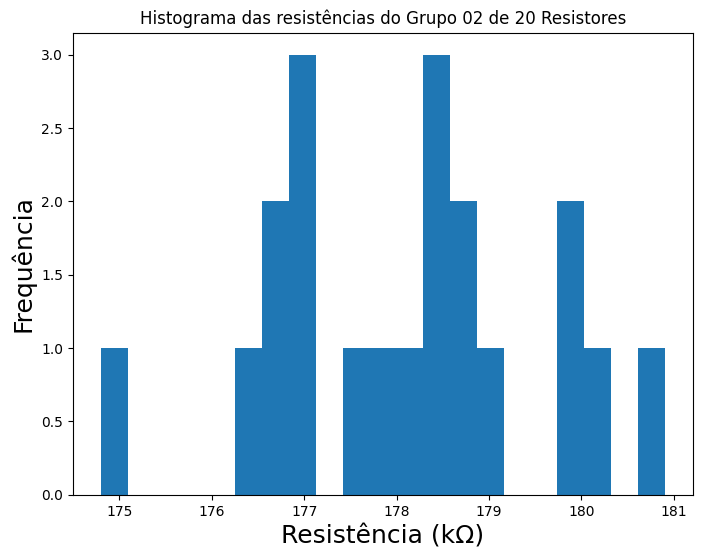

In [74]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR02, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 02 de 20 Resistores', fontsize=12 )


In [75]:
var_gr2 = np.var( array_GR02, ddof=1 )
print ( "Variância do Grupo 02: {}".format(var_gr2), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 02: {}".format(np.sqrt(var_gr2)),"(kΩ)" )
sigma_m2 = np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)
print ( "Erro da média do Grupo 02: {}".format(np.std( array_GR02, ddof=1 )/np.sqrt(N2_20)),"(kΩ)" )

Variância do Grupo 02: 2.270105263157891 (k^2Ω)
Desvio Padrao do do Grupo 02: 1.5066868497328472 (kΩ)
Erro da média do Grupo 02: 0.3369054216807657 (kΩ)


Estimativa Padrão GR02:

In [76]:
print ( "R2 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR02 ), 0 ), np.round( sigma_m2, 0 ) ) )


R2 = 178 ± 0 (kΩ)


Grupo 03 de valores de resistências:

In [77]:
#Calculo da média
N3_20=len(array_GR03)
media_GR03=(np.sum(array_GR03)/N3_20)
vmin = np.min(array_GR03)
vmax = np.max(array_GR03)
amplitude_GR03=(np.max(array_GR03)-np.min(array_GR03))
print ( "Valor mínimo: {}".format( np.min(array_GR03) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR03) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR03 ),"(kΩ)" )
print("média do conjunto de 20 resistores do Grupo 03: {}".format( (media_GR03)),"(kΩ)")

Valor mínimo: 176.2 (kΩ)
Valor máximo: 183.0 (kΩ)
Amplitude: 6.800000000000011 (kΩ)
média do conjunto de 20 resistores do Grupo 03: 178.42000000000002 (kΩ)


In [78]:
#Usando o NumPy
np.mean( array_GR03 )

178.42000000000002

Text(0.5, 1.0, 'Histograma das resistências do Grupo 03 de 20 Resistores')

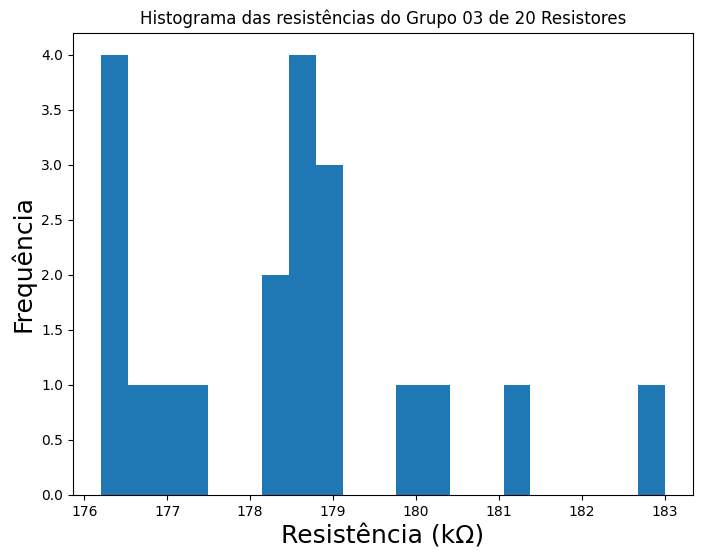

In [79]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR03, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 03 de 20 Resistores', fontsize=12 )


In [80]:
var_gr3 = np.var( array_GR03, ddof=1 )
print ( "Variância do Grupo 03: {}".format(var_gr3), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 03: {}".format(np.sqrt(var_gr3)),"(kΩ)" )
sigma_m3 = np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)
print ( "Erro da média do Grupo 03: {}".format(np.std( array_GR03, ddof=1 )/np.sqrt(N3_20)),"(kΩ)" )

Variância do Grupo 03: 3.059578947368427 (k^2Ω)
Desvio Padrao do do Grupo 03: 1.7491652144289935 (kΩ)
Erro da média do Grupo 03: 0.39112523233412255 (kΩ)


Estimativa Padrão GR03:

In [81]:
print ( "R3 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR03 ), 1 ), np.round( sigma_m3, 1 ) ) )


R3 = 178 ± 0 (kΩ)


Grupo 04 de valores de resistências:

In [82]:
#Calculo da média
N4_20=len(array_GR04)
media_GR04=(np.sum(array_GR04)/N4_20)
vmin = np.min(array_GR04)
vmax = np.max(array_GR04)
amplitude_GR04=(np.max(array_GR04)-np.min(array_GR04))
print ( "Valor mínimo: {}".format( np.min(array_GR04) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR04) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR04 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 04: {}".format( (media_GR04)),"(kΩ)")

Valor mínimo: 175.3 (kΩ)
Valor máximo: 188.4 (kΩ)
Amplitude: 13.099999999999994 (kΩ)
média do conjunto de 20 resistências do Grupo 04: 178.62 (kΩ)


In [83]:
#Usando o NumPy
np.mean( array_GR04 )

178.62

Text(0.5, 1.0, 'Histograma das resistências do Grupo 04 de 20 Resistores')

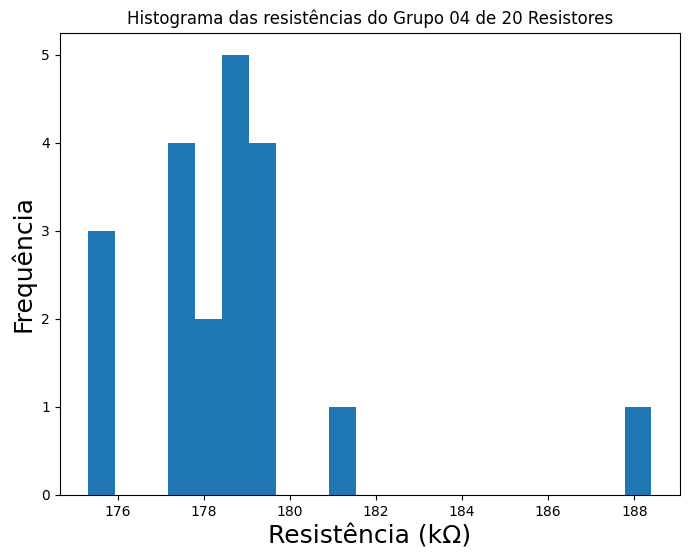

In [31]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR04, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 04 de 20 Resistores', fontsize=12 )


In [32]:
var_gr4 = np.var( array_GR04, ddof=1 )
print ( "Variância do Grupo 04: {}".format(var_gr4), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 04: {}".format(np.sqrt(var_gr4)),"(kΩ)" )
sigma_m4 = np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)
print ( "Erro da média do Grupo 04: {}".format(np.std( array_GR04, ddof=1 )/np.sqrt(N4_20)),"(kΩ)" )

Variância do Grupo 04: 7.436421052631571 (k^2Ω)
Desvio Padrao do do Grupo 04: 2.7269802075980625 (kΩ)
Erro da média do Grupo 04: 0.6097713117485756 (kΩ)


Estimativa Padrão GR04:

In [33]:
print ( "R4 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR04 ), 1 ), np.round( sigma_m4, 1 ) ) )


R4 = 179 ± 1 (kΩ)


Grupo 05 de valores de resistências:


In [34]:
#Calculo da média
N5_20=len(array_GR05)
media_GR05=(np.sum(array_GR05)/N5_20)
vmin = np.min(array_GR05)
vmax = np.max(array_GR05)
amplitude_GR05=(np.max(array_GR05)-np.min(array_GR05))
print ( "Valor mínimo: {}".format( np.min(array_GR05) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GR05) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GR05 ),"(kΩ)" )
print("média do conjunto de 20 resistências do Grupo 05: {}".format( (media_GR05)),"(kΩ)")

Valor mínimo: 176.2 (kΩ)
Valor máximo: 181.8 (kΩ)
Amplitude: 5.600000000000023 (kΩ)
média do conjunto de 20 resistências do Grupo 05: 178.485 (kΩ)


In [35]:
#Usando o NumPy
np.mean( array_GR05 )

178.485

Text(0.5, 1.0, 'Histograma das resistências do Grupo 05 de 20 Resistores')

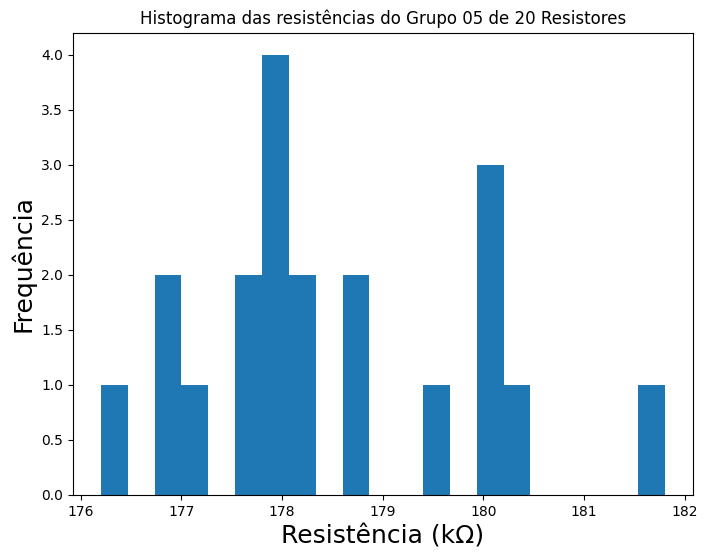

In [36]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GR05, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do Grupo 05 de 20 Resistores', fontsize=12 )

In [37]:
var_gr5 = np.var( array_GR05, ddof=1 )
print ( "Variância do Grupo 05: {}".format(var_gr5), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo 05: {}".format(np.sqrt(var_gr5)),"(kΩ)" )
sigma_m5 = np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)
print ( "Erro da média do Grupo 05: {}".format(np.std( array_GR05, ddof=1 )/np.sqrt(N5_20)),"(kΩ)" )

Variância do Grupo 05: 2.073973684210528 (k^2Ω)
Desvio Padrao do do Grupo 05: 1.440129745616876 (kΩ)
Erro da média do Grupo 05: 0.32202280076188144 (kΩ)


Estimativa Padrão GR05:


In [38]:
print ( "R5 = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GR05 ), 1 ), np.round( sigma_m5, 1 ) ) )


R5 = 178 ± 0 (kΩ)


Média das Médias:

In [39]:
array_GRM = [np.mean( array_GR01 ),np.mean( array_GR02 ),np.mean( array_GR03 ),np.mean( array_GR04),np.mean( array_GR05)] #kΩ

In [40]:
N=len(array_GRM)
media_GRM=(np.sum(array_GRM)/N)
vmin = np.min(array_GRM)
vmax = np.max(array_GRM)
amplitude_GRM=(np.max(array_GRM)-np.min(array_GRM))
print ( "Valor mínimo: {}".format( np.min(array_GRM) ),"(kΩ)")
print ( "Valor máximo: {}".format( np.max(array_GRM) ) ,"(kΩ)")
print ( "Amplitude: {}".format( amplitude_GRM ),"(kΩ)" )
print("média do conjunto das médias das resistências: {}".format( (media_GRM)),"(kΩ)")

Valor mínimo: 178.12000000000003 (kΩ)
Valor máximo: 178.62 (kΩ)
Amplitude: 0.4999999999999716 (kΩ)
média do conjunto das médias das resistências: 178.41200000000003 (kΩ)


In [41]:
#Usando o NumPy
np.mean( array_GRM )

178.41200000000003

Text(0.5, 1.0, 'Histograma das resistências do grupo das médias')

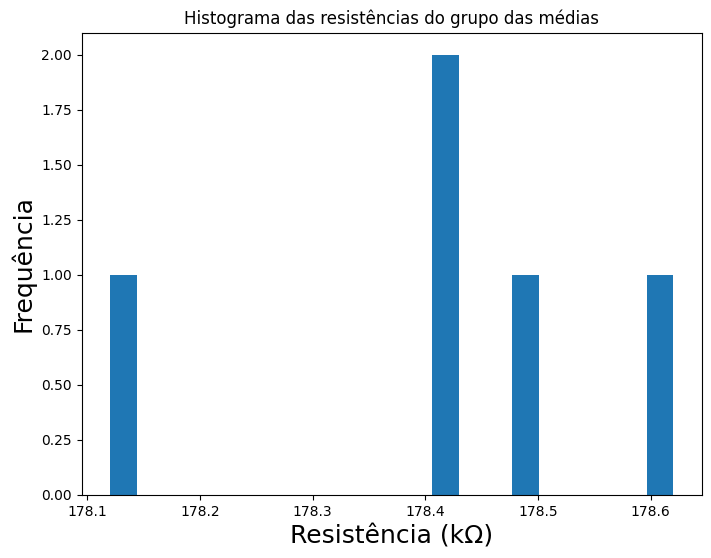

In [42]:
fig = plt.figure( figsize=(8,6) )

counts, bins, _ = plt.hist( array_GRM, bins=21, range=[vmin,vmax])
#plt.xlim( 15, 40 )
plt.xlabel( "Resistência (kΩ)", fontsize=18 )
plt.ylabel( "Frequência", fontsize=18 )
plt.title('Histograma das resistências do grupo das médias', fontsize=12 )

In [43]:
var_grm = np.var( array_GRM, ddof=1 )
print ( "Variância do Grupo das médias: {}".format(var_grm), "(k^2Ω)" )
print ( "Desvio Padrao do do Grupo das médias: {}".format(np.sqrt(var_grm)),"(kΩ)" )
sigma_m = np.std( array_GRM, ddof=1 )/np.sqrt(N)
print ( "Erro da média do Grupo das médias: {}".format(np.std( array_GRM, ddof=1 )/np.sqrt(N)),"(kΩ)" )

Variância do Grupo das médias: 0.03348249999999625 (k^2Ω)
Desvio Padrao do do Grupo das médias: 0.1829822395753103 (kΩ)
Erro da média do Grupo das médias: 0.08183214527310921 (kΩ)


Estimativa padrão do grupo das médias:

In [44]:
print ( "RM = {:.0f} ± {:.0f} (kΩ)".format( np.round( np.mean( array_GRM ), 1 ), np.round( sigma_m, 1 ) ) )


RM = 178 ± 0 (kΩ)


Desvio Padrão do conjunto com 100 resistores:


In [86]:
sigma_L_p = np.std( array_100, ddof=0 )
print ( "Desvio padrão populacional (kΩ) = {}".format(sigma_L_p  ) )

sigma_L_a = np.std( array_100, ddof=1 )
print ( "Desvio padrão amostral (kΩ) = {}".format(sigma_L_a  ) )



Desvio padrão populacional (kΩ) = 1.7809143718887779
Desvio padrão amostral (kΩ) = 1.789886289486829


Erro Relativo:

In [46]:
erro_relativo100 = sigma_m100 / media_100
print ( "Erro relativo das medidas dos 100 resistores = {}".format( erro_relativo100*100 ),"(kΩ)" )
erro_relativo1 = sigma_m1/ media_GR01
print ( "Erro relativo das medidas do grupo 1 = {}".format( erro_relativo1*100  ),"(kΩ)" )
erro_relativo2 = sigma_m2/ media_GR02
print ( "Erro relativo das medidas do grupo 2 = {}".format( erro_relativo2*100  ),"(kΩ)" )
erro_relativo3 = sigma_m3/ media_GR03
print ( "Erro relativo das medidas do grupo 3 = {}".format( erro_relativo3*100  ),"(kΩ)" )
erro_relativo4 = sigma_m4/ media_GR04
print ( "Erro relativo das medidas do grupo 4 = {}".format( erro_relativo4*100  ),"(kΩ)" )
erro_relativo5 = sigma_m5/ media_GR05
print ( "Erro relativo das medidas do grupo 5 = {}".format( erro_relativo5*100  ),"(kΩ)" )
erro_relativoM = sigma_m/ media_GRM
print ( "Erro relativo das medidas do grupo das médias = {}".format( erro_relativoM*100  ),"(kΩ)" )

Erro relativo das medidas dos 100 resistores = 0.09982032441140608 (kΩ)
Erro relativo das medidas do grupo 1 = 0.1639792244827675 (kΩ)
Erro relativo das medidas do grupo 2 = 0.1891451951946809 (kΩ)
Erro relativo das medidas do grupo 3 = 0.2192160252965601 (kΩ)
Erro relativo das medidas do grupo 4 = 0.34137907946958657 (kΩ)
Erro relativo das medidas do grupo 5 = 0.1804200917510611 (kΩ)
Erro relativo das medidas do grupo das médias = 0.04586695136712171 (kΩ)


Razão entre os erros das médias de cada grupo e o erro da média do conjunto completo:

In [47]:
erro_r1 = sigma_m1/sigma_m100
print ( "Razão do sigma_m1/sigma_m100   = {}".format( np.round(erro_r1 ),2) )

erro_r2 = sigma_m2/sigma_m100
print ( "Razão do sigma_m2/sigma_m100   = {}".format( np.round(erro_r2 ) ,2))

erro_r3 = sigma_m3/sigma_m100
print ( "Razão do sigma_m3/sigma_m100   = {}".format(np.round( erro_r3 ),2 ))

erro_r4 = sigma_m4/sigma_m100
print ( "Razão do sigma_m4/sigma_m100   = {}".format( erro_r4 ) )

erro_r5 = sigma_m5/sigma_m100
print ( "Razão do sigma_m5/sigma_m100   = {}".format( np.round(erro_r5 ),2) )

Razão do sigma_m1/sigma_m100   = 2.0
Razão do sigma_m2/sigma_m100   = 2.0
Razão do sigma_m3/sigma_m100   = 2.0
Razão do sigma_m4/sigma_m100   = 3.4239226847379114
Razão do sigma_m5/sigma_m100   = 2.0


In [48]:
print("O grupo de 100 é ou não compatível com o R de ref.:",compatibilidadeRef(array_100))

Incompatível 3995.6328683299557 0.1780914371888778 711.588
O grupo de 100 é ou não compatível com o R de ref.: 3995.6328683299557


In [49]:
print("O grupo 01 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR01))

Compatível 0.008758984794313456 0.34250544674885364 0.0030000000000427463
O grupo 01 é  ou não compatível com o grupo de 100: 0.008758984794313456


In [50]:
print("O grupo 02 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR02))

Compatível 0.7662436863902149 0.38107981205765096 0.29199999999994475
O grupo 02 é  ou não compatível com o grupo de 100: 0.7662436863902149


In [51]:
print("O grupo 03 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR03))

Compatível 0.018614947735965354 0.42976215208929386 0.008000000000038199
O grupo 03 é  ou não compatível com o grupo de 100: 0.018614947735965354


In [52]:
print("O grupo 04 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR04))

Compatível 0.3274321537657905 0.6352461039877211 0.20800000000002683
O grupo 04 é  ou não compatível com o grupo de 100: 0.3274321537657905


In [53]:
print("O grupo 05 é  ou não compatível com o grupo de 100:",compatibilidade(array_GR05))

Compatível 0.19837597828451792 0.3679881033546144 0.07300000000003593
O grupo 05 é  ou não compatível com o grupo de 100: 0.19837597828451792
